# Regression process

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
dataset=pd.read_csv('C:/Users/Nandan/Dropbox/PG-DBDA CDAC Mumbai/ML/Salary_Data.csv')

NameError: name 'pd' is not defined

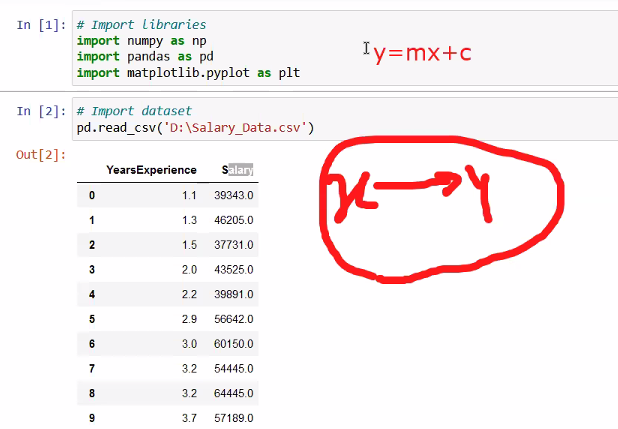

In [3]:
# finding the relation y=mx+c is crucial in linear regression
# We can find the equation by finding the coefficients (slope and y-intercept)


In [4]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [5]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [8]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [9]:
#Prediction
y_pred=model.predict(X_test)
#PRedicted values
y_pred


array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

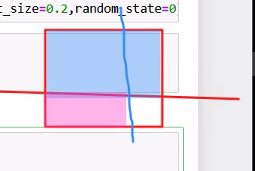

Text(0.5, 1.0, 'Distribution of salary Vs Experience')

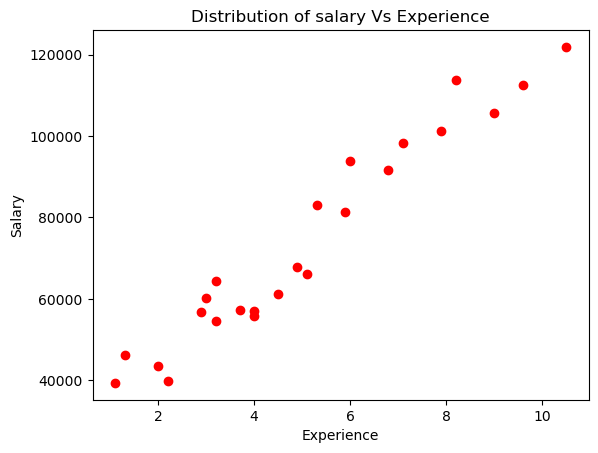

In [10]:
plt.scatter(X_train,y_train,color='red')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Distribution of salary Vs Experience')

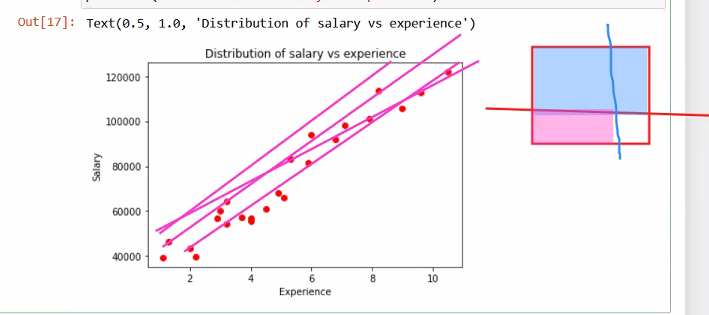

In [11]:
# We have to find out how our prediction line would look on the
# datapoints

Text(0.5, 1.0, 'Distribution of salary Vs Experience')

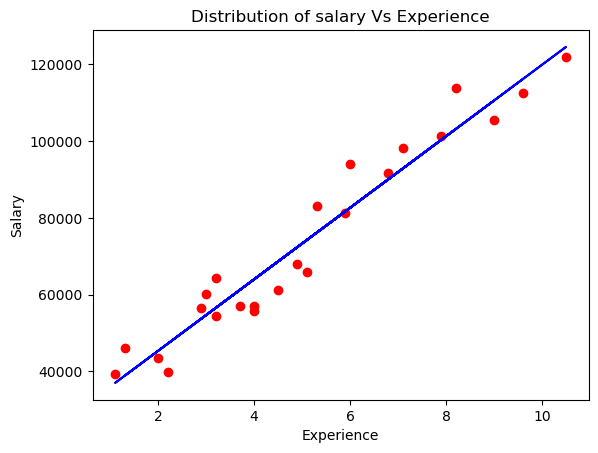

In [12]:
#prediction of training data
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,model.predict(X_train), color='blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Distribution of salary Vs Experience')

Text(0.5, 1.0, 'Distribution of salary Vs Experience')

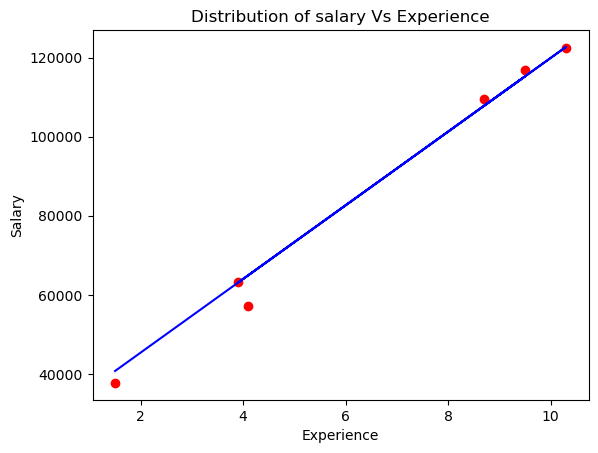

In [13]:
#prediction of testing data
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,model.predict(X_test), color='blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Distribution of salary Vs Experience')

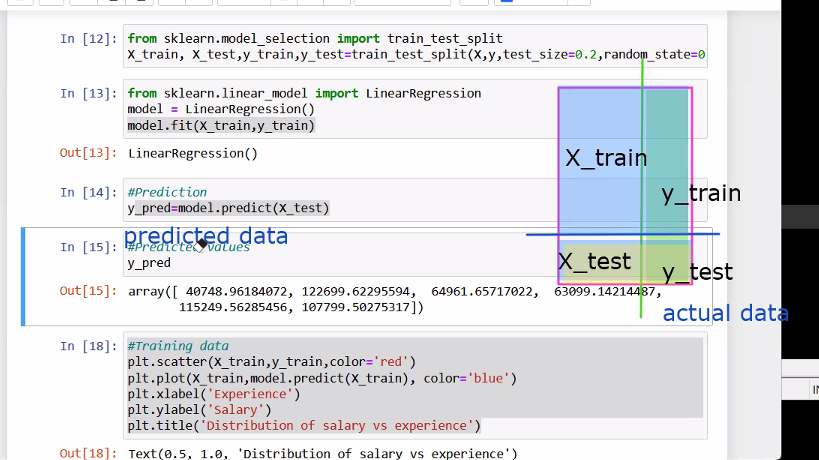

In [14]:
c=model.coef_ #gives the coefficient value of the linear fucntion, i.e here it's the slope
c

array([9312.57512673])

In [15]:
m=model.intercept_ #returns the y-intercept
m

26780.099150628186

In [16]:
model.predict([[11]])

array([129218.42554465])

In [17]:
# Mean-Squared Error (MSE)
from sklearn import metrics

In [18]:
metrics.mean_squared_error(y_test,y_pred)

12823412.298126562

In [19]:
#OLS is an API used to show the statistics
#for a training/testing dataset
#It is used to show the statistics summary including p-test, ANOVA, ARIMA ...

import statsmodels.api as sm
X_stats=sm.add_constant(X_train)
summ=sm.OLS(y_train,X_stats).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     352.1
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           5.03e-15
Time:                        11:28:02   Log-Likelihood:                -242.89
No. Observations:                  24   AIC:                             489.8
Df Residuals:                      22   BIC:                             492.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.678e+04   2818.687      9.501      0.000    2.09e+04    3.26e+04
x1          9312.5751    496.279     18.765      0.000    8283.355    1.03e+04
==============================================================================
Omnibus:                        3.105   Durbin-Watson:                   2.608
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                1.567
Skew:                           0.297   Prob(JB):                        0.457
Kurtosis:                       1.898   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MULTIPLE LINEAR REGRESSION

In [20]:
startup=pd.read_csv('C:/Users/Nandan/Dropbox/PG-DBDA CDAC Mumbai/ML/50_Startups.csv')

In [21]:
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [22]:
startup.shape

(50, 5)

In [23]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [24]:
X=startup.iloc[:,:-1].values
y=startup.iloc[:,-1].values

In [25]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [26]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [27]:
#Converting categorical column "State" to numeric using OneHotEncoding technique
#ColumnTranformer is another API used to transform columns as per specified criteria
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough') 
# "State" column index = 3
# remainder='passthrough' means that the remaining unmodified columns are kept as they were
# X = np.array(ct.fit_transform(X))
X = ct.fit_transform(X)

In [28]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [31]:
#model.predict(X_train, y_train)

y_pred=model.predict(X_test)
#np.set_printoptions(precision=2)
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

array([[103015.20159794, 103282.38      ],
       [132582.27760815, 144259.4       ],
       [132447.73845174, 146121.95      ],
       [ 71976.09851258,  77798.83      ],
       [178537.48221057, 191050.39      ],
       [116161.24230168, 105008.31      ],
       [ 67851.69209677,  81229.06      ],
       [ 98791.73374686,  97483.56      ],
       [113969.43533014, 110352.25      ],
       [167921.06569552, 166187.94      ]])

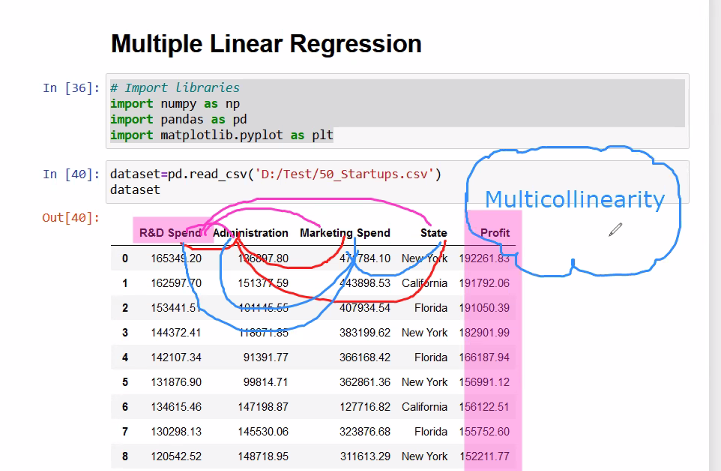

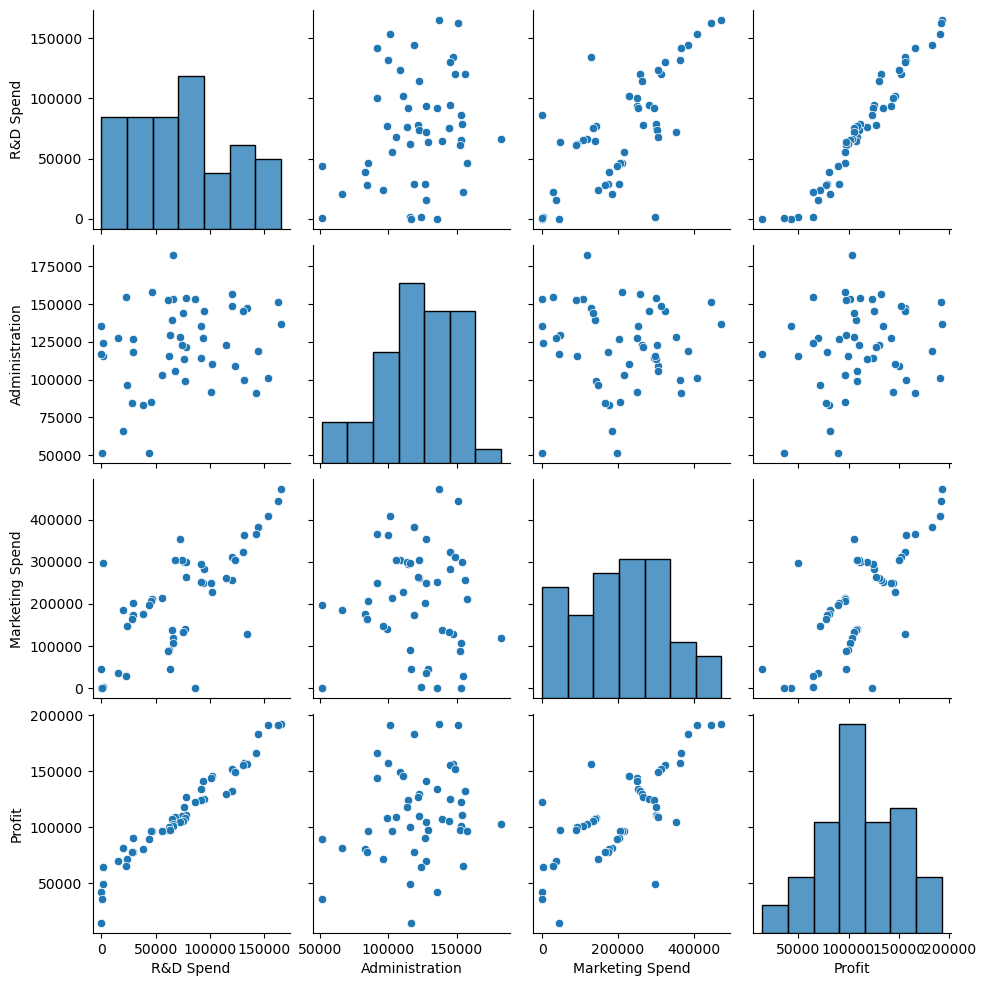

In [32]:
# the problem of "multicollinearity" arises in multiple linear regression
# Multicollinearlity: It means that the dependent column/variable depends on different features of the independent column set
# Individual features in the independent column set may be depnedent on on another
# A pair plot can illustrate the relations between the features in a multi-feature dataset, useful for multiple regression analysis
# Below , a pair plot has been drwan to show the relation of one column with the other columns. It shows the collinearlity/correlation
import seaborn as sns
sns.pairplot(startup)

<AxesSubplot:>

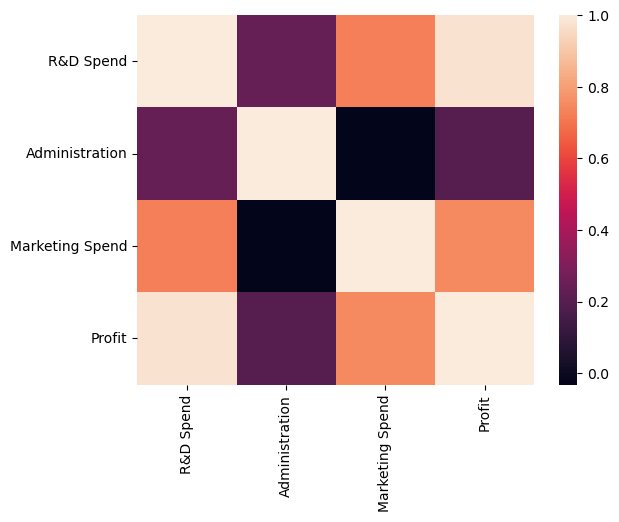

In [33]:


sns.heatmap(startup.corr())

In [34]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


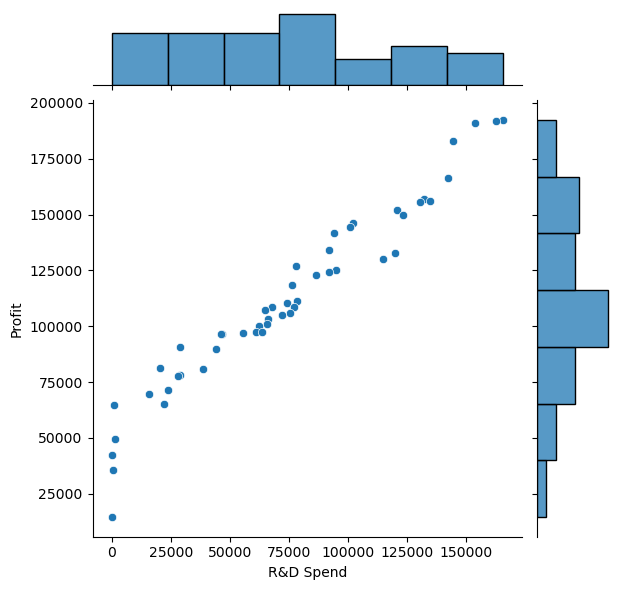

In [35]:
sns.jointplot(x='R&D Spend',y='Profit',data=startup)

# POLYNOMIAL REGRESSION

In [36]:
polyData=pd.read_csv('C:/Users/Nandan/Dropbox/PG-DBDA CDAC Mumbai/ML/Position_Salaries.csv')

In [37]:
polyData

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [38]:
X=polyData.iloc[:,1:-1].values
y=polyData.iloc[:,-1].values

In [39]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [40]:
from sklearn.linear_model import LinearRegression
#ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough') 
#X = ct.fit_transform(X)
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [41]:
#from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
reg=PolynomialFeatures(degree=4)
poly=reg.fit_transform(X)
model1=LinearRegression()
model1.fit(poly,y)

LinearRegression()

Text(0.5, 1.0, 'Distribution of Salary Vs Position')

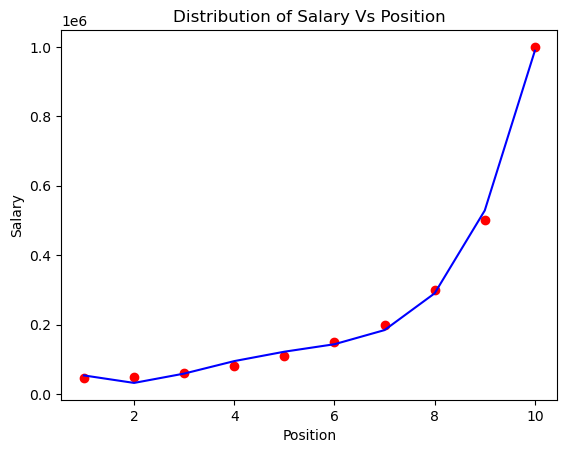

In [42]:
#plotting the prediction curve
#y_pred=model.predict(poly)
#np.set_printoptions(precision=2)
#np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)
#X_1=X[:,-1]

plt.scatter(X,y,color='red')
plt.plot(X,model1.predict(reg.fit_transform(X)), color='blue')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Distribution of Salary Vs Position')

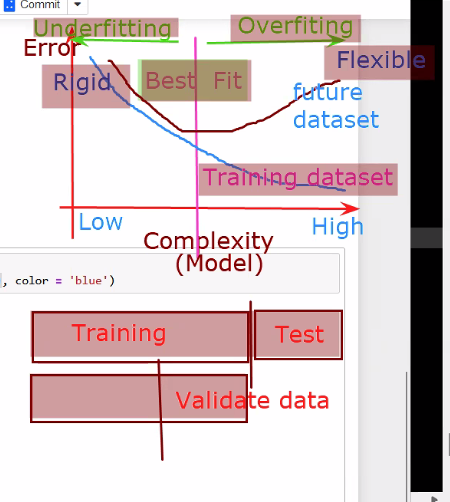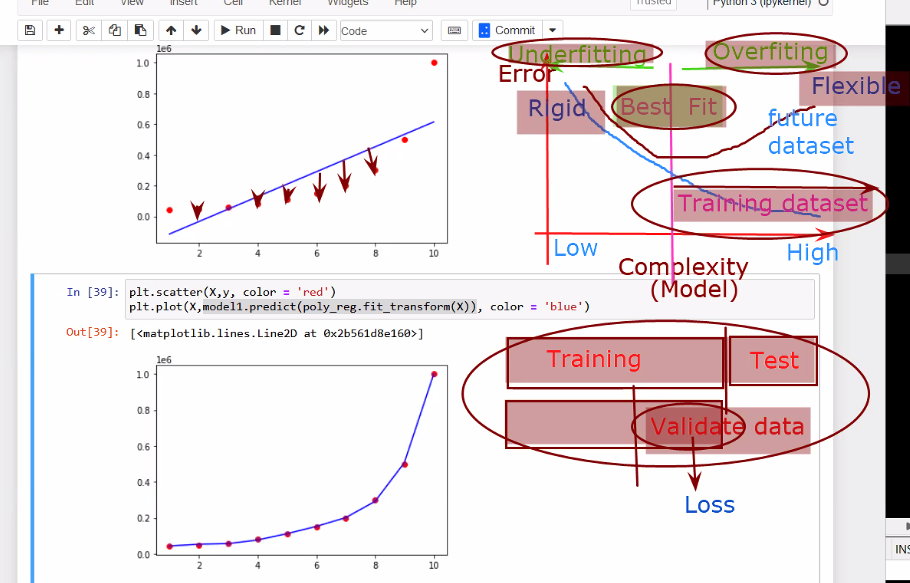

In [ ]:
#for the training dataset, high model complexity leads to overfitting and accurate predictions and low error on the testing dataset
# in the real world future data, only the best fit model has lowest error, overfit and underfit models both have high error on future data
# Underfit models are "rigid", Overfit models become "flexible"
# for a dataset with high "variance", the data is highly varied, means the data has near-zero correlation
# underfitting and overfitting can be significantly controlled by identifying features of the dataset that are causing this, removing these features or transforming/scaling them during preprocessing


In [43]:
X_1.size


NameError: name 'X_1' is not defined

In [ ]:
y.size

In [ ]:
X.size

In [ ]:
X[:,-1].size

In [ ]:
X_1.size

In [ ]:
X_1

In [ ]:
y

In [ ]:
X_1.toarray()

In [ ]:
y.shape

In [ ]:
X_1.reshape(X_1.size,1365).shape

In [ ]:
y.reshape(y.size,1)

In [ ]:
poly

In [ ]:
poly.toarray()